In [58]:
import time
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import hsv, twilight_shifted
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
%matplotlib notebook

In [78]:
def plot_3d(latent, labels, alpha=0.7, s=0.5, title=""):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(latent[:, 0], latent[:, 1], latent[:, 2], alpha=alpha, c=labels, s=s, cmap=hsv)
    
    ax.set_title(title)
    return fig, ax

def plot_2d(latent, labels, alpha=0.7, s=1.0, title=""):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    scatter = ax.scatter(latent[:, 0], latent[:, 1], alpha=alpha, c=labels, s=s, label=labels)
#     legend = ax.legend(*scatter.legend_elements(num=len(np.unique(labels))), loc="upper left", title="Types")
#     ax.add_artist(legend)
    ax.set_title(title, fontsize=25)
    return fig, ax

def validate_knn(train, test, n_neighbors, model_name, accuracies=defaultdict(list)):
    train_data, train_labels = train
    test_data, test_labels = test
    for k in n_neighbors:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(train_data, train_labels)
        pred_labels = classifier.predict(test_data)
        accuracies[model_name + f"_k{k}"].append(accuracy_score(test_labels, pred_labels))
    return accuracies

def validate_lr(train, test, n_neighbors, model_name, accuracies=defaultdict(list)):
    train_data, train_labels = train
    test_data, test_labels = test
    classifier = LogisticRegression()
    classifier.fit(train_data, train_labels)
    pred_labels = classifier.predict(test_data)
    accuracies[model_name + f"_k{k}"].append(accuracy_score(test_labels, pred_labels))
    return accuracies

# fig, ax = plot_3d(latent, labels, title="RTD H0 AE dSprites 3d")

In [24]:
latent_dim = 2

# Load data

In [48]:
dataset_name = 'COIL-20'
data = np.load(f'data/{dataset_name}/prepared/data.npy')
try:
    labels = np.load(f'data/{dataset_name}/prepared/labels.npy')
except FileNotFoundError:
    labels = np.ones(data.shape[0])

In [49]:
if len(data.shape) > 2:
    data = data.reshape(data.shape[0], -1)

# TSNE

In [41]:
tsne = TSNE(n_components=latent_dim)

In [42]:
start = time.time()
tsne_latent = tsne.fit_transform(data)
end = time.time()
print(f"It took: {end-start}s")

/workspace/env_umap/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/workspace/env_umap/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


It took: 129.7645230293274s


<IPython.core.display.Javascript object>


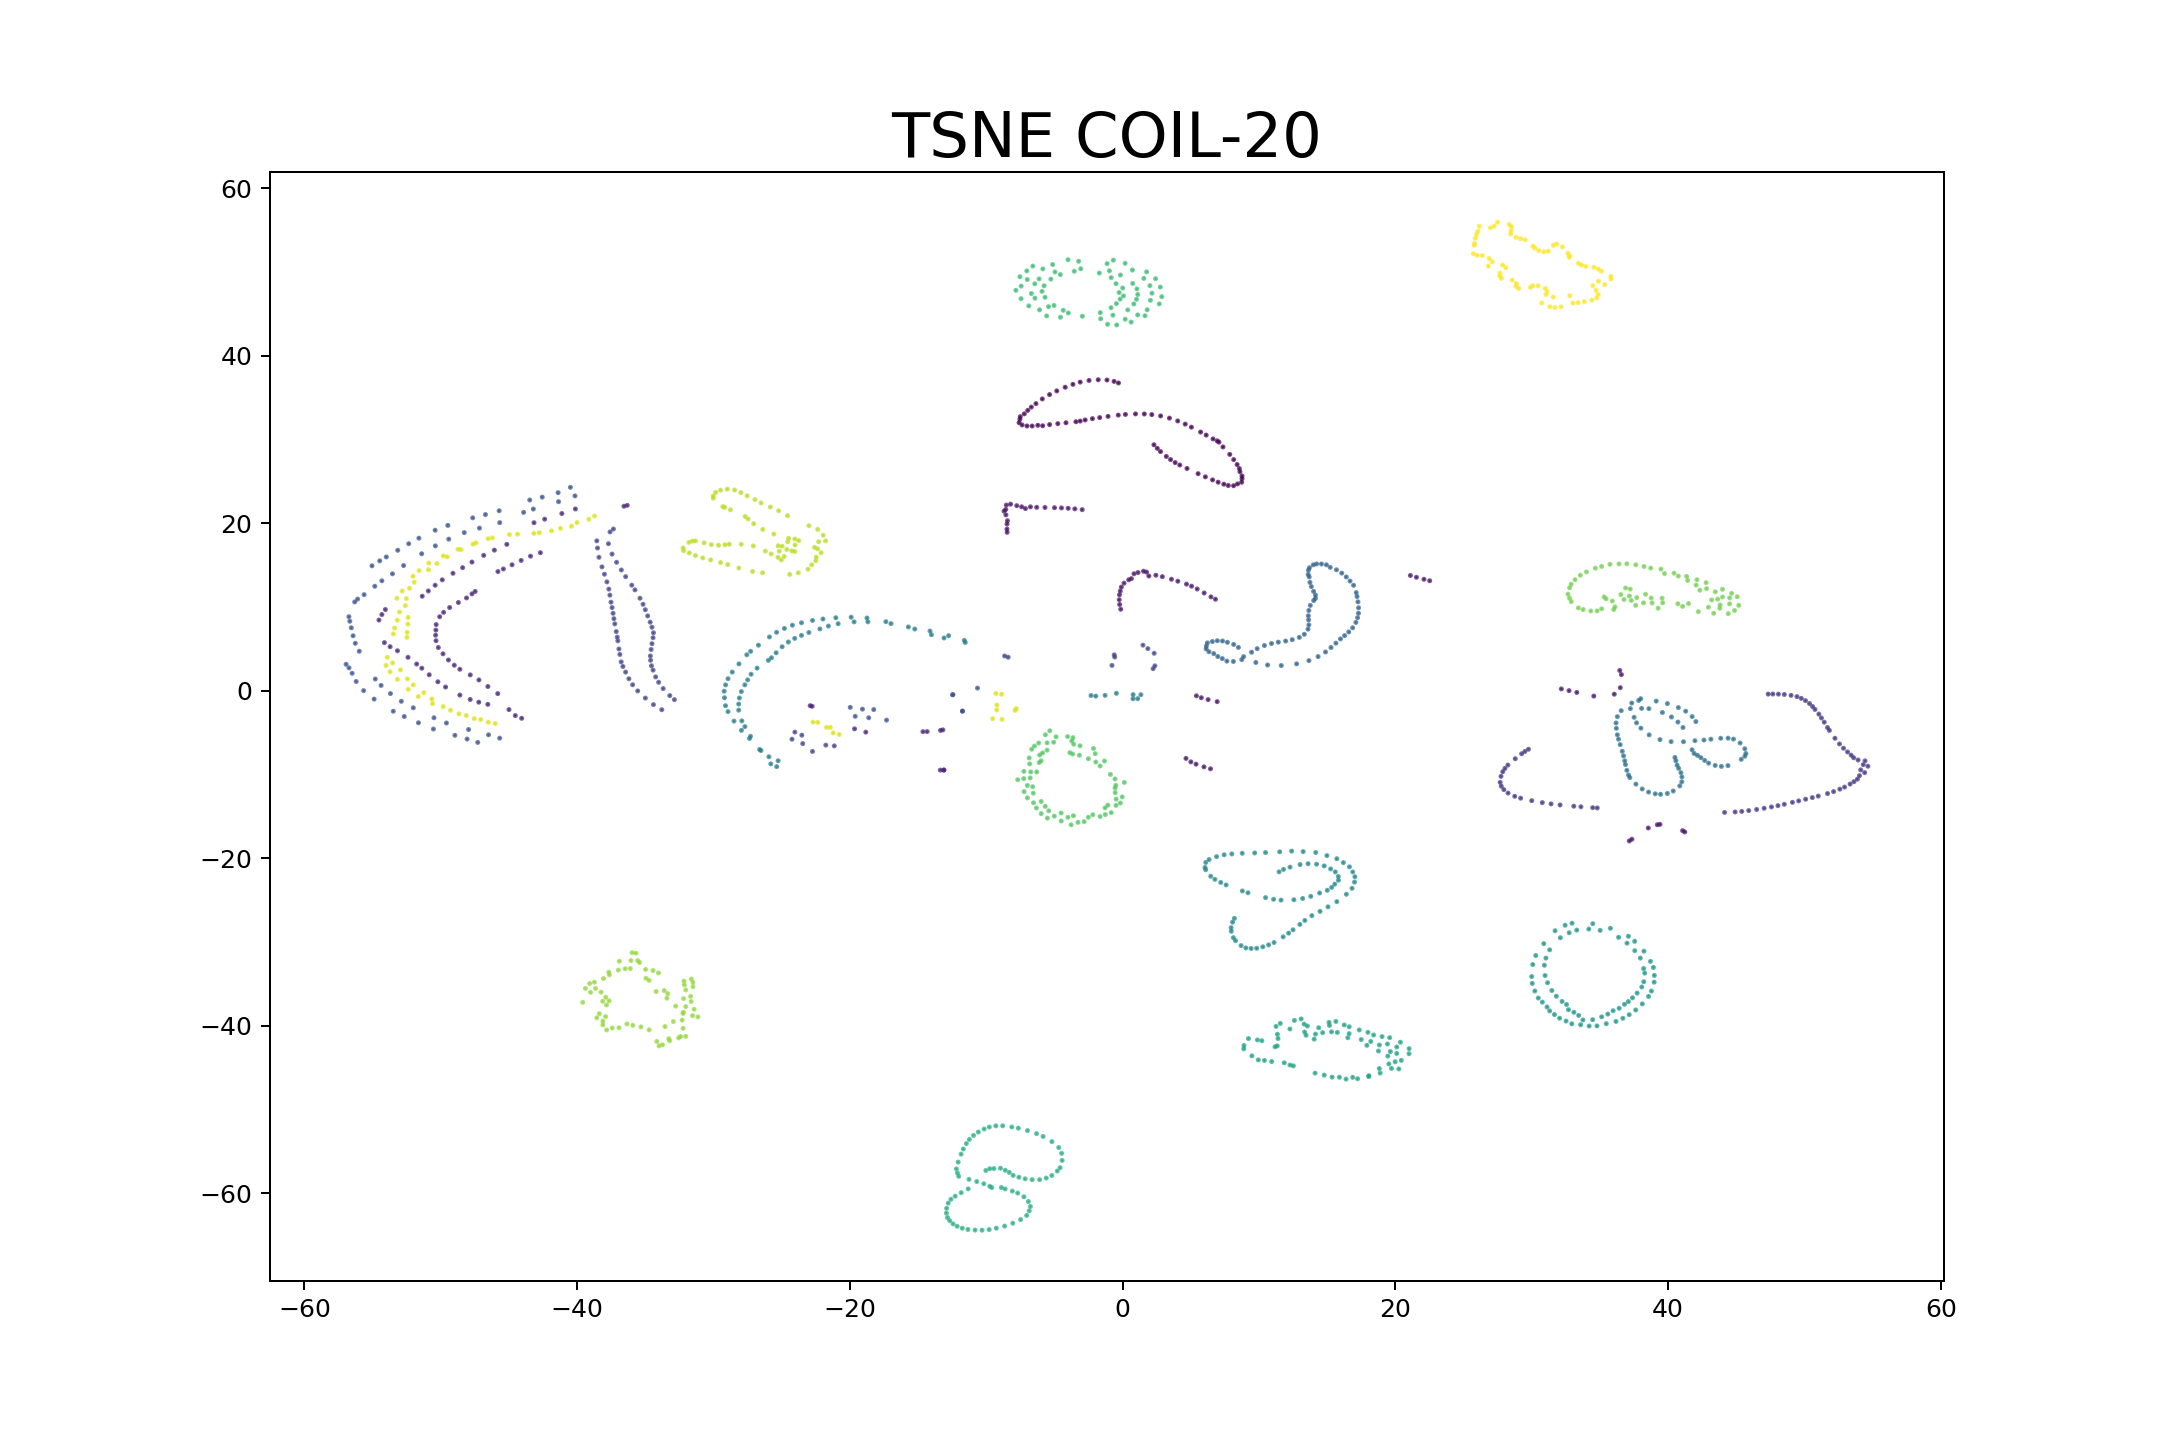

In [80]:
if latent_dim > 2:
    plot_3d(tsne_latent, labels, title=f"TSNE {dataset_name}")
else:
    plot_2d(tsne_latent, labels, title=f"TSNE {dataset_name}")

# UMAP

In [60]:
model = umap.UMAP(n_components=latent_dim)

In [61]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.31799084, -0.31799084, -0.31799084, ..., -0.31921899,
        -0.31965909, -0.31799084],
       [-0.31799084, -0.31799084, -0.31799084, ..., -0.31921899,
        -0.31965909, -0.31799084],
       [-0.31799084, -0.31799084, -0.31799084, ..., -0.31921899,
        -0.31965909, -0.31799084],
       ...,
       [ 3.48732888,  3.48732888,  3.48732888, ...,  3.47975083,
         3.47931551,  3.48732888],
       [-0.31799084, -0.31799084, -0.31799084, ..., -0.31921899,
        -0.31965909, -0.31799084],
       [-0.31799084, -0.31799084, -0.31799084, ..., -0.31921899,
        -0.31965909, -0.31799084]])

In [62]:
start = time.time()
umap_latent = model.fit_transform(data)
end = time.time()
print(f"It took: {end-start}s")

It took: 27.20373821258545s


<IPython.core.display.Javascript object>


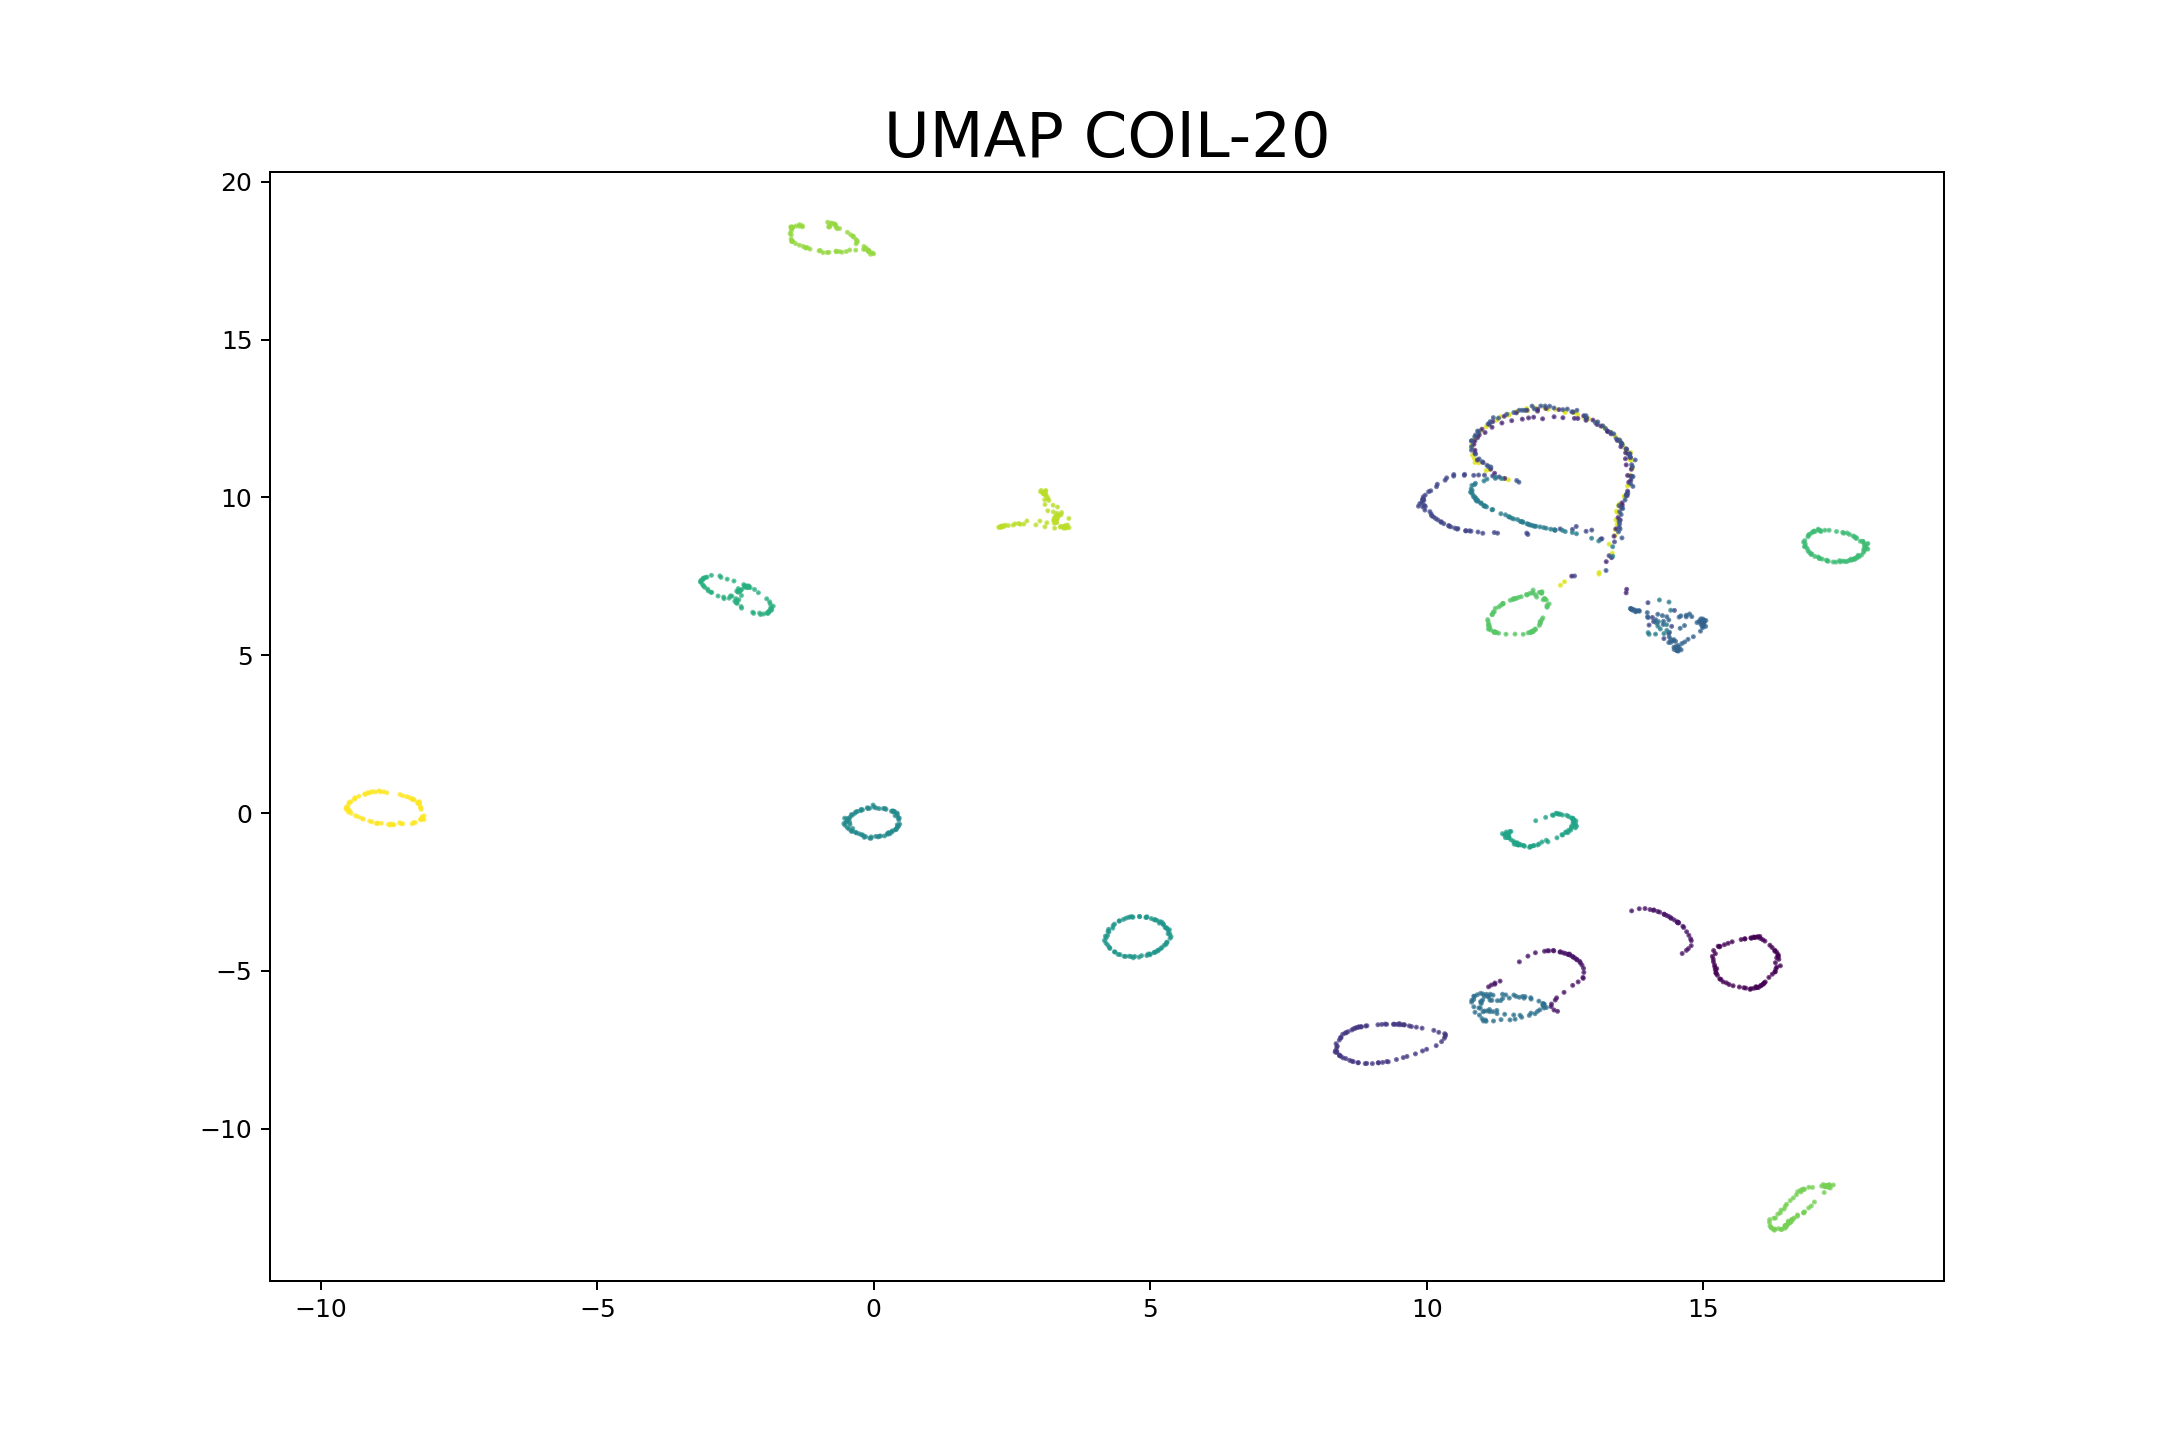

In [79]:
if latent_dim > 2:
    plot_3d(umap_latent, labels, title=f"UMAP {dataset_name}")
else:
    plot_2d(umap_latent, labels, title=f"UMAP {dataset_name}")